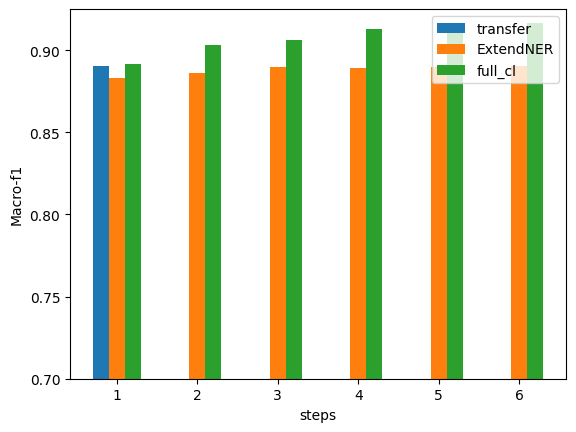

[0.89028275 0.443871   0.2984291  0.22203666 0.17949281 0.14830393]
[0.88278436 0.88590843 0.89002417 0.88908441 0.88982716 0.89043037]
[0.8916647  0.90338336 0.90618635 0.91302633 0.91430259 0.91653917]
[0.89028275 0.887742   0.89528731 0.88814662 0.89746403 0.88982355]


In [4]:
from matplotlib import pyplot as plt
import json
import numpy as np

permutations = [['ORG', 'PER', 'CVL', 'DAT', 'LOC', 'QNT'],
               ['DAT', 'QNT', 'PER', 'LOC', 'ORG', 'CVL'],
               ['CVL', 'LOC', 'ORG', 'QNT', 'DAT', 'PER'],
               ['QNT', 'ORG', 'DAT', 'PER', 'CVL', 'LOC'],
               ['LOC', 'CVL', 'QNT', 'ORG', 'PER', 'DAT'],
               ['PER', 'DAT', 'LOC', 'CVL', 'QNT', 'ORG']]

x = np.arange(1,7)
y = []
y1 = []
y2 = []
y3 = []

for perm in range(1,7):
    temp = []
    temp1 = []
    temp2 = []
    temp3 = []
    
    for step in range(1, 7):
        file_path = './transfer/perm_' + str(perm) + '/step' + str(step) + '/final/test_results.json'
        file_path1 = './new_1_1/perm_' + str(perm) + '/step' + str(step) + '/final/test_results.json'
        file_path2 = './full_cl_result/perm_' + str(perm) + '/step' + str(step) + '/final/test_results.json'
        with open(file_path, 'r') as f:
            data = json.load(f)
        temp.append(data['eval_entity_macro_f1'])
        temp3.append(data['eval_'+permutations[perm-1][step-1]+'_f1'])
        with open(file_path1, 'r') as f:
            data = json.load(f)
        temp1.append(data['eval_entity_macro_f1'])
        with open(file_path2, 'r') as f:
            data = json.load(f)
        temp2.append(data['eval_entity_macro_f1'])
        
    y.append(temp)
    y1.append(temp1)
    y2.append(temp2)
    y3.append(temp3)
    
y = np.mean(np.array(y), axis=0)
y1 = np.mean(np.array(y1), axis=0)
y2 = np.mean(np.array(y2), axis=0)
y3 = np.mean(np.array(y3), axis=0)
w = 0.2
plt.bar(x-w, y, label='transfer', width=w)
plt.bar(x, y1, label='ExtendNER', width=w)
plt.bar(x+w, y2, label='full_cl', width=w)
plt.ylim(0.7, 0.925)
plt.xlabel('steps')
plt.ylabel('Macro-f1')
plt.legend()
plt.show()

print(y)
print(y1)
print(y2)
print(y3)

In [5]:
permutations = [['ORG', 'PER', 'CVL', 'DAT', 'LOC', 'QNT'],
               ['DAT', 'QNT', 'PER', 'LOC', 'ORG', 'CVL'],
               ['CVL', 'LOC', 'ORG', 'QNT', 'DAT', 'PER'],
               ['QNT', 'ORG', 'DAT', 'PER', 'CVL', 'LOC'],
               ['LOC', 'CVL', 'QNT', 'ORG', 'PER', 'DAT'],
               ['PER', 'DAT', 'LOC', 'CVL', 'QNT', 'ORG']]

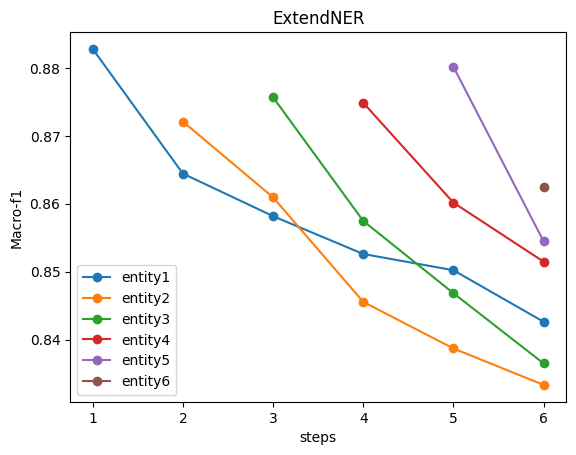

In [6]:
import json
from matplotlib import pyplot as plt
import numpy as np
entity = {i:[[] for j in range(6)] for i in range(1,7)}


for perm in range(1,7):
    for step in range(1,7):
        file_path = './self_train_result/perm_' + str(perm) + '/step' + str(step) + '/final/test_results.json'
        with open(file_path, 'r') as f:
            data = json.load(f)
            
        for st in range(step):
            entity[st+1][perm-1].append(data['eval_' + permutations[perm-1][st] + '_f1'])
            #entity[st+1][0].append(data['eval_' + permutations[perm-1][st] + '_f1'])            

for key, value in entity.items():
    temp = np.mean(np.array(value), axis=0)
    entity[key] = temp    
    
plt.plot(x, entity[1], marker='o', label='entity1')
plt.plot(x[1:], entity[2], marker='o', label='entity2')
plt.plot(x[2:], entity[3], marker='o', label='entity3')
plt.plot(x[3:], entity[4], marker='o', label='entity4')
plt.plot(x[4:], entity[5], marker='o', label='entity5')
plt.plot(x[5:], entity[6], marker='o', label='entity6')
# plt.plot(x, entity[1], marker='o', label=permutations[perm-1][0])
# plt.plot(x[1:], entity[2], marker='o', label=permutations[perm-1][1])
# plt.plot(x[2:], entity[3], marker='o', label=permutations[perm-1][2])
# plt.plot(x[3:], entity[4], marker='o', label=permutations[perm-1][3])
# plt.plot(x[4:], entity[5], marker='o', label=permutations[perm-1][4])
# plt.plot(x[5:], entity[6], marker='o', label=permutations[perm-1][5])
plt.title('ExtendNER')
plt.xlabel('steps')
plt.ylabel('Macro-f1')
plt.legend()
plt.show()

In [5]:
entity

{1: array([0.85662211, 0.83018868, 0.84436043, 0.83886839, 0.85084959,
        0.85534591]),
 2: array([0.82957746, 0.88586546, 0.89549962, 0.89554531, 0.88686409]),
 3: array([0.5817942 , 0.59657555, 0.66938009, 0.65897663]),
 4: array([0.66149871, 0.75728155, 0.76297335]),
 5: array([0.82673478, 0.83333333]),
 6: array([0.60927152])}